In [14]:
import wandb
import numpy as np
import sys
import torch
import torch.utils.data as Data
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import LearningRateMonitor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import torch.nn as nn
import glob
import xarray as xr
import matplotlib.pyplot as plt


BASE = '/scratch/ab10313/pleiades/'
PATH_NN_1= BASE+'NN_data_1/'
PATH_NN_1_2= BASE+'NN_data_1_2/'
PATH_NN_1_4= BASE+'NN_data_1_4/'
PATH_NN_1_8= BASE+'NN_data_1_8/'
PATH_NN_1_12= BASE+'NN_data_1_12/'


import submeso_ml.systems.regression_system as regression_system
import submeso_ml.models.fcnn as fcnn
import submeso_ml.data.dataset as dataset

# Define X,Y pairs (state, subgrid fluxes) for local network.local_torch_dataset = Data.TensorDataset(
BATCH_SIZE = 64  # Number of sample in each batch



In [15]:
it = 0

In [16]:
# load WB 
WB_1 = np.load(PATH_NN_1+'WB_sg.npy')[it]
WB_1_2 = np.load(PATH_NN_1_2+'WB_sg.npy')[it]
WB_1_8 = np.load(PATH_NN_1_8+'WB_sg.npy')[it]
WB_1_12 = np.load(PATH_NN_1_12+'WB_sg.npy')[it]

In [18]:
PATH_LIST_full = glob.glob(BASE+'*/preprcossed_data/')
i_loc=0
lat_plot = xr.open_dataarray(PATH_LIST_full[i_loc]+'lat.nc')
lon_plot = xr.open_dataarray(PATH_LIST_full[i_loc]+'lon.nc')

#grid scale 

grid_factor = 4
lat_1_12 = lat_plot.coarsen(j=grid_factor, boundary="trim").mean()
lon_1_12 = lon_plot.coarsen(i=grid_factor, boundary="trim").mean()

grid_factor = 6
lat_1_8 = lat_plot.coarsen(j=grid_factor, boundary="trim").mean()
lon_1_8 = lon_plot.coarsen(i=grid_factor, boundary="trim").mean()

grid_factor = 12
lat_1_4 = lat_plot.coarsen(j=grid_factor, boundary="trim").mean()
lon_1_4 = lon_plot.coarsen(i=grid_factor, boundary="trim").mean()

grid_factor = 24
lat_1_2 = lat_plot.coarsen(j=grid_factor, boundary="trim").mean()
lon_1_2 = lon_plot.coarsen(i=grid_factor, boundary="trim").mean()

grid_factor = 48
lat_1 = lat_plot.coarsen(j=grid_factor, boundary="trim").mean()
lon_1 = lon_plot.coarsen(i=grid_factor, boundary="trim").mean()

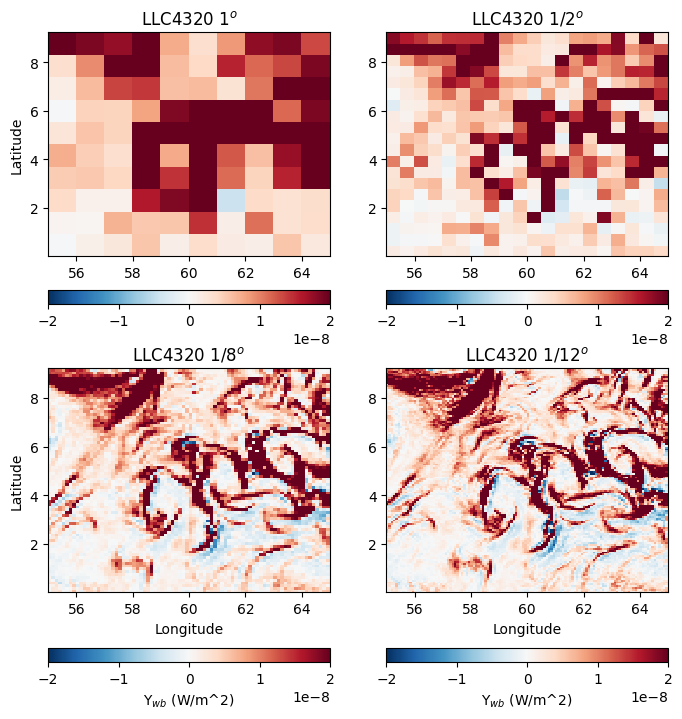

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,8))
#fig.tight_layout(pad=5.0)

i_loc=0
it = 107
clim = 2e-8

plt.subplot(2,2,1)
plt.pcolor(lon_1,lat_1,WB_1,cmap='RdBu_r',vmin=-clim,vmax=clim)
#plt.xticks([])
#plt.yticks([])
cb = plt.colorbar(location='bottom',pad=0.05,anchor=(.0,0.3))
#cb.set_label(r'$\overline{w^\prime b^\prime}^z$' + ' (W/m)')
plt.title('LLC4320 $1^o$',fontsize=12)
plt.ylabel('Latitude')

plt.subplot(2,2,2)
plt.pcolor(lon_1_2,lat_1_2,WB_1_2,cmap='RdBu_r',vmin=-clim,vmax=clim)
#plt.xticks([])
#plt.yticks([])
cb = plt.colorbar(location='bottom',pad=0.05,anchor=(.0,0.3))
#cb.set_label(r'$\overline{w^\prime b^\prime}^z$' + ' (W/m)')
plt.title('LLC4320 $1/2^o$',fontsize=12)

plt.subplot(2,2,3)
plt.pcolor(lon_1_8,lat_1_8,WB_1_8,cmap='RdBu_r',vmin=-clim,vmax=clim)
#plt.xticks([])
#plt.yticks([])
cb = plt.colorbar(location='bottom',pad=0.05,anchor=(.0,-0.5))
cb.set_label(r'$\Upsilon_{wb}$' + ' (W/m^2)')
plt.title('LLC4320 $1/8^o$',fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(2,2,4)
plt.pcolor(lon_1_12,lat_1_12,WB_1_12,cmap='RdBu_r',vmin=-clim,vmax=clim)
#plt.xticks([])
#plt.yticks([])
cb = plt.colorbar(location='bottom',pad=0.05,anchor=(.0,-0.5))
cb.set_label(r'$\Upsilon_{wb}$' + ' (W/m^2)')
plt.title('LLC4320 $1/12^o$',fontsize=12)
plt.xlabel('Longitude')

#plt.savefig('./figures/snapshots')
plt.savefig('./figures/snapshots_resolution', transparent=True)